In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [25]:
df = pd.read_csv("Google_Stock_Train (2010-2022).csv")

train_data, test_data = train_test_split(df, test_size=0.2,shuffle=False)

In [26]:
seq_length = 10
batch_size=1

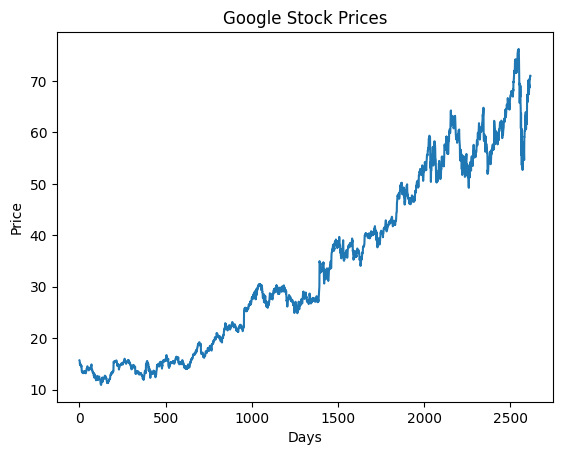

In [27]:
plt.plot(train_data["Close"])
plt.title("Google Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [29]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data[["Close"]])

In [33]:
x_train=[]
y_train=[]
for i in range(seq_length, len(scaled_train)):
  x_train.append(scaled_train[i-seq_length:i])
  y_train.append(scaled_train[i])

In [34]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
model = Sequential([
    SimpleRNN(50, input_shape=(seq_length,1)),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer="adam", loss="mse")

In [38]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
2607/2607 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0057
Epoch 2/10
2607/2607 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.6366e-04
Epoch 3/10
2607/2607 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 2.2420e-04
Epoch 4/10
2607/2607 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 2.0378e-04
Epoch 5/10
2607/2607 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 2.2305e-04
Epoch 6/10
2607/2607 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 2.0028e-04
Epoch 7/10
2607/2607 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.9578e-04
Epoch 8/10
2607/2607 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.6354e-04
Epoch 9/10
2607/2607 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.5855e-04
Epoch 10/10
2607/2607 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 1.7107e-04


In [40]:
all_data = pd.concat([train_data['Close'], test_data['Close']], axis=0)
inputs = all_data[-(len(test_data)+seq_length):].values.reshape(-1,1)
scaled_inputs = scaler.transform(inputs)

x_test=[]
for i in range(seq_length, len(scaled_inputs)):
  x_test.append(scaled_inputs[i-seq_length])

x_test = np.array(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [41]:
pred = model.predict(x_test)
pred_prices = scaler.inverse_transform(pred)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [42]:
actual_prices = test_data['Close'].values
mae = mean_absolute_error(actual_prices, pred_prices)
accuracy = 100-(mae/np.mean(actual_prices)*100)

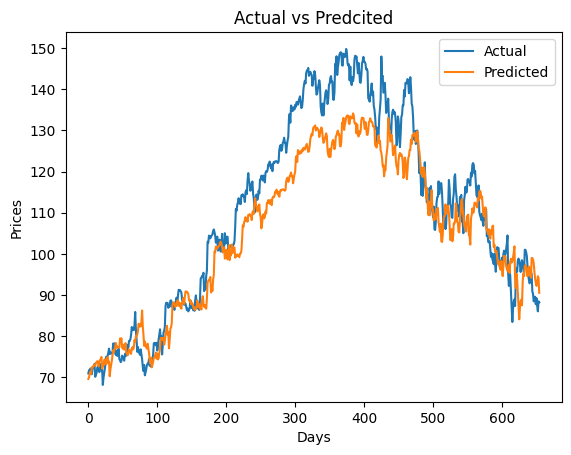

In [43]:
plt.plot(actual_prices, label="Actual")
plt.plot(pred_prices, label="Predicted")
plt.title("Actual vs Predcited")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

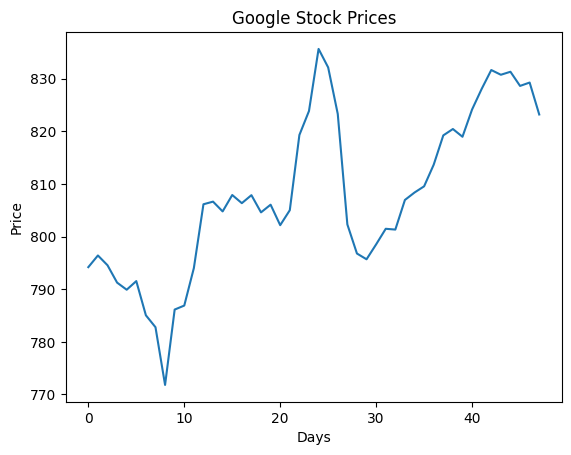

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3055
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0591
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0406
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0601
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0365
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0385
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0360
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
MAE: 15.16
Accuracy: 98.19%


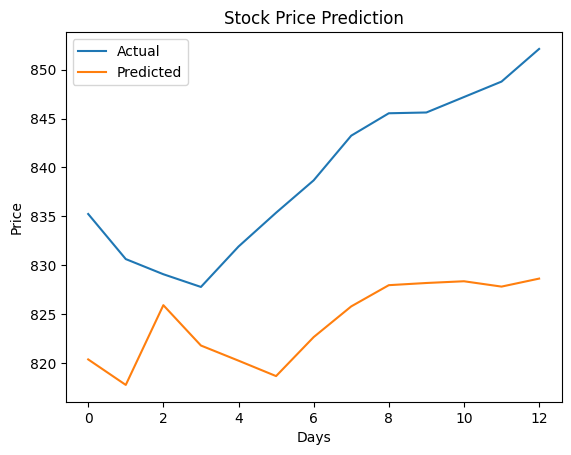

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Configuration Variables
sequence_length = 10  # Number of days to look back for prediction
test_size = 0.2  # Proportion of data to be used for testing (20% here)
batch_size = 1  # Batch size for training
epochs = 10  # Number of training epochs

# Load the dataset
df = pd.read_csv('goog.csv')

# Split the data into train and test sets
train_data, test_data = train_test_split(df, test_size=test_size, shuffle=False)

# Plot training data
plt.plot(train_data['Close'])
plt.title("Google Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

# Scale the training closing prices between 0 and 1
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data[['Close']])

# Create training sequences (last 'sequence_length' days used to predict next day)
X_train, y_train = [], []
for i in range(sequence_length, len(scaled_train)):
    X_train.append(scaled_train[i-sequence_length:i])
    y_train.append(scaled_train[i])

X_train, y_train = np.array(X_train), np.array(y_train)

# Build a simple RNN model
model = Sequential([
    SimpleRNN(50, input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Prepare test data (last 'sequence_length' days from training + test set)
all_data = pd.concat([train_data['Close'], test_data['Close']], axis=0)
inputs = all_data[-(len(test_data) + sequence_length):].values.reshape(-1, 1)
scaled_inputs = scaler.transform(inputs)

X_test = []
for i in range(sequence_length, len(scaled_inputs)):
    X_test.append(scaled_inputs[i-sequence_length:i])

X_test = np.array(X_test)

# Predict and reverse scaling
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)

# Calculate accuracy
actual_prices = test_data['Close'].values
mae = mean_absolute_error(actual_prices, predicted_prices)
accuracy = 100 - (mae / np.mean(actual_prices) * 100)

print(f"MAE: {mae:.2f}")
print(f"Accuracy: {accuracy:.2f}%")

# Plot the results
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title("Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


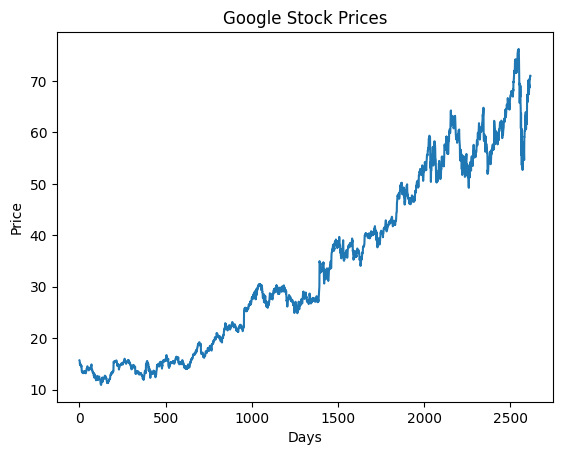

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0031
Epoch 2/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 4.1661e-04
Epoch 3/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2.6585e-04
Epoch 4/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 1.6763e-04
Epoch 5/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 1.7367e-04
Epoch 6/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.4948e-04
Epoch 7/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1.4273e-04
Epoch 8/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.1539e-04
Epoch 9/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.3566e-04
Epoch 10/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 1.3963e-04
 1/21 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
MAE: 3.90
Accuracy: 96.46%


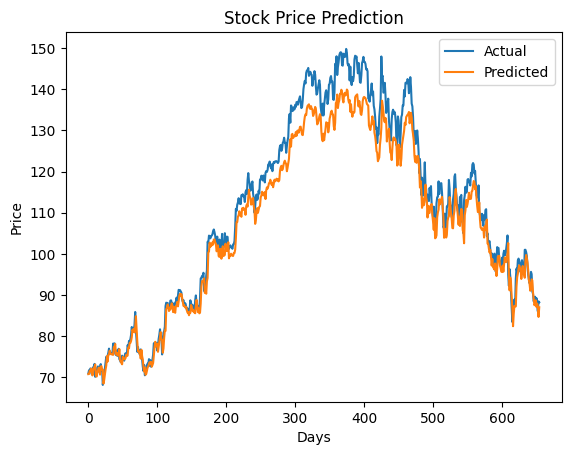

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Configuration Variables
sequence_length = 60  # Number of days to look back for prediction
test_size = 0.2  # Proportion of data to be used for testing (20% here)
batch_size = 5  # Batch size for training
epochs = 10  # Number of training epochs

# Load the dataset
df = pd.read_csv('Google_Stock_Train (2010-2022).csv')

# Split the data into train and test sets
train_data, test_data = train_test_split(df, test_size=test_size, shuffle=False)

# Plot training data
plt.plot(train_data['Close'])
plt.title("Google Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

# Scale the training closing prices between 0 and 1
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data[['Close']])

# Create training sequences (last 'sequence_length' days used to predict next day)
X_train, y_train = [], []
for i in range(sequence_length, len(scaled_train)):
    X_train.append(scaled_train[i-sequence_length:i])
    y_train.append(scaled_train[i])

X_train, y_train = np.array(X_train), np.array(y_train)

# Build a simple RNN model
model = Sequential([
    SimpleRNN(50, input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Prepare test data (last 'sequence_length' days from training + test set)
all_data = pd.concat([train_data['Close'], test_data['Close']], axis=0)
inputs = all_data[-(len(test_data) + sequence_length):].values.reshape(-1, 1)
scaled_inputs = scaler.transform(inputs)

X_test = []
for i in range(sequence_length, len(scaled_inputs)):
    X_test.append(scaled_inputs[i-sequence_length:i])

X_test = np.array(X_test)

# Predict and reverse scaling
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)

# Calculate accuracy
actual_prices = test_data['Close'].values
mae = mean_absolute_error(actual_prices, predicted_prices)
accuracy = 100 - (mae / np.mean(actual_prices) * 100)

print(f"MAE: {mae:.2f}")
print(f"Accuracy: {accuracy:.2f}%")

# Plot the results
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title("Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [44]:
code = r"""
#include <iostream>
#include <cstdlib>
#include <ctime>
#include <chrono>
#include <cuda_runtime.h>

using namespace std;
using namespace std::chrono;

// CUDA kernel to multiply matrices
__global__ void multiply(int* A, int* B, int* C, int M, int N, int K) {
    int row = blockIdx.y * blockDim.y + threadIdx.y;
    int col = blockIdx.x * blockDim.x + threadIdx.x;

    if (row < M && col < K) {
        int sum = 0;
        for (int i = 0; i < N; i++) {
            sum += A[row * N + i] * B[i * K + col];
        }
        C[row * K + col] = sum;
    }
}

// Randomly initialize matrix with values between 0 and 9
void initialize(int* matrix, int rows, int cols) {
    for (int i = 0; i < rows * cols; i++) {
        matrix[i] = rand() % 10;  // Random value from 0 to 9
    }
}

// Print matrix
void print(int* matrix, int rows, int cols) {
    for (int row = 0; row < rows; row++) {
        for (int col = 0; col < cols; col++) {
            cout << matrix[row * cols + col] << " ";
        }
        cout << '\n';
    }
    cout << '\n';
}

// Sequential CPU matrix multiplication
void sequentialMultiply(int* A, int* B, int* C, int M, int N, int K) {
    for (int i = 0; i < M; i++) {
        for (int j = 0; j < K; j++) {
            int sum = 0;
            for (int k = 0; k < N; k++) {
                sum += A[i * N + k] * B[k * K + j];
            }
            C[i * K + j] = sum;
        }
    }
}

int main() {
    srand(time(0)); // Seed the random number generator

    int M, N, K;
    cout << "Enter the number of rows and columns of the first matrix: ";
    cin >> M >> N;
    cout << "Enter the number of columns of the second matrix: ";
    cin >> K;

    int* A = new int[M * N];
    int* B = new int[N * K];
    int* C = new int[M * K];

    initialize(A, M, N);
    initialize(B, N, K);

    cout << "Matrix A: \n";
    print(A, M, N);

    cout << "Matrix B: \n";
    print(B, N, K);

    int *X, *Y, *Z;
    cudaMalloc(&X, M * N * sizeof(int));
    cudaMalloc(&Y, N * K * sizeof(int));
    cudaMalloc(&Z, M * K * sizeof(int));

    cudaMemcpy(X, A, M * N * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(Y, B, N * K * sizeof(int), cudaMemcpyHostToDevice);

    int THREADS = 16;
    int BLOCK_X = (K + THREADS - 1) / THREADS;
    int BLOCK_Y = (M + THREADS - 1) / THREADS;

    dim3 threads(THREADS, THREADS);
    dim3 blocks(BLOCK_X, BLOCK_Y);

    // Sequential multiplication
    auto start = high_resolution_clock::now();
    sequentialMultiply(A, B, C, M, N, K);
    auto stop = high_resolution_clock::now();
    auto seq_duration = duration_cast<microseconds>(stop - start);

    cout << "Sequential Multiplication of matrix A and B: \n";
    print(C, M, K);

    // Parallel multiplication
    start = high_resolution_clock::now();
    multiply<<<blocks, threads>>>(X, Y, Z, M, N, K);
    cudaDeviceSynchronize();  // Wait for kernel to finish
    cudaMemcpy(C, Z, M * K * sizeof(int), cudaMemcpyDeviceToHost);
    stop = high_resolution_clock::now();
    auto par_duration = duration_cast<microseconds>(stop - start);

    cout << "Parallel Multiplication of matrix A and B: \n";
    print(C, M, K);

    cout << "Sequential Multiplication Time: " << seq_duration.count() << " microseconds" << endl;
    cout << "Parallel Multiplication Time: " << par_duration.count() << " microseconds" << endl;

    delete[] A;
    delete[] B;
    delete[] C;

    cudaFree(X);
    cudaFree(Y);
    cudaFree(Z);

    return 0;
}

"""

with open("mat_mult.cu", "w") as f:
  f.write(code)